# Imports e inicializações

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


import os
from glob import glob, iglob

import openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook 
from openpyxl.utils.dataframe import dataframe_to_rows

import pandas as pd

from itertools import islice


In [8]:
root_dir = "/dados01/workspace/ufmg.f01dcc/m03/business_understanding/data/resultados_classificacao/"

if not os.path.exists(os.path.join(root_dir, "img/")):
        os.makedirs(os.path.join(root_dir, "img/"))


# Leitura dos dados da planilha em um dataframe

In [9]:
def leitura_planilha(file):
    nome = file.split("/")[-1].split(".")[0]
    print("Município: ", nome)
    
    wb = load_workbook(file)
    
    ws = wb.active
    
    df = pd.DataFrame()
    df_real_class = pd.DataFrame(columns=['class','count'])
    df_class = pd.DataFrame(columns=['class','count'])
    
    #Lendo os dados da planilha e armazenando em um dataframe
    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    #idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    df = pd.DataFrame(data, columns=cols)
    
    df = df.rename({'level_1': 'class'}, axis=1)  # new method
    
    #print(df_aux["class"][0])
   
    return df

# Plotando imagems

In [10]:
def gera_graficos(df_aux, title):
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    total = float(df_aux[0].sum()/2.0)
    
    sns_plot = sns.barplot(x=df_aux["class"], y=df_aux[0],hue=df_aux["level_0"],data=df_aux, palette="GnBu", zorder=100, ci=None)
    
    sns_plot.set(xlabel="Classe", ylabel = "Quantidade")
    
    
    sns_plot.set_title(title)
    
    sns_plot.legend(title="Abordagem", fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    '''for p in sns_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_plot.annotate(percentage, (x, y),ha='center')
        #sns_plot.annotate(y, (x, y),ha='center')'''
        
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    plt.grid(zorder=1)
    plt.show()
    
    
    sns_plot = sns_plot.get_figure()
    
    #Salvando em alta resolução - dpi=600
    sns_plot.savefig(root_dir+"img/"+nome+".png", dpi=150)

In [11]:
def gera_graficos_manual(df_aux, title):
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    
    total = float(df_aux["level_0"].sum())
    
    print(total)
    
    sns_plot = sns.barplot(x=df_aux["class"], y=df_aux["level_0"],data=df_aux, color='#66c3a6', zorder=100, ci=None)
    
    sns_plot.set(xlabel="Classe", ylabel = "Quantidade")
    
    
    sns_plot.set_title(title)
    
    #sns_plot.legend(title="Abordagem", fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    '''for p in sns_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_plot.annotate(percentage, (x, y),ha='center')
        #sns_plot.annotate(y, (x, y),ha='center')'''

    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
    plt.grid(zorder=1)
    plt.show()
    
    
    sns_plot = sns_plot.get_figure()
    
    #Salvando em alta resolução - dpi=600
    sns_plot.savefig(root_dir+"img/"+nome+"-manual.png", dpi=150)

Município:  sao bento abade_doc_classification
          level_0             city        class   0
0  Palavras-chave  sao bento abade          ata  17
1  Palavras-chave  sao bento abade       edital  20
2  Palavras-chave  sao bento abade  homologação   3
3  Palavras-chave  sao bento abade       outros  16
4          Manual  sao bento abade          ata  14
5          Manual  sao bento abade       edital  18
6          Manual  sao bento abade  homologação   3
7          Manual  sao bento abade       outros  21


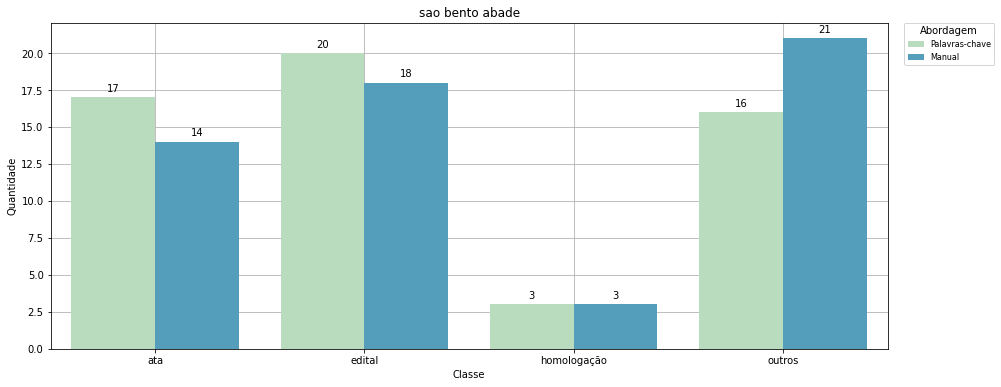

sao bento abade
         class  level_0
0          ata       14
1       edital       18
2  homologação        3
3       outros       21
56.0


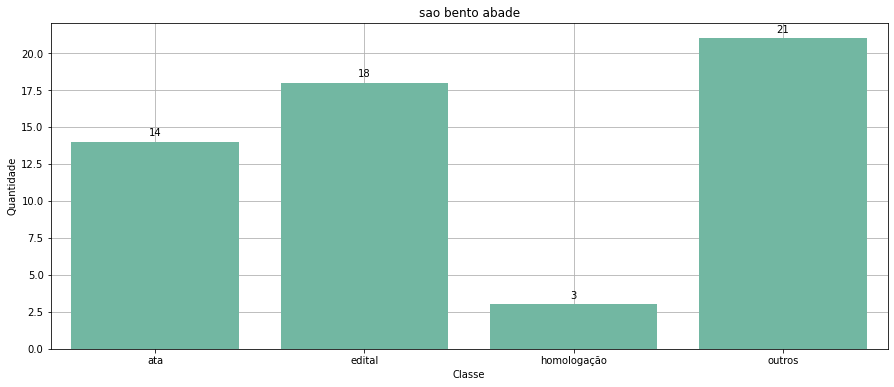

Município:  passa vinte_doc_classification
          level_0         city        class   0
0  Palavras-chave  passa vinte          ata   6
1  Palavras-chave  passa vinte       edital  20
2  Palavras-chave  passa vinte  homologação   5
3  Palavras-chave  passa vinte       outros  20
4          Manual  passa vinte          ata   6
5          Manual  passa vinte       edital  21
6          Manual  passa vinte  homologação   4
7          Manual  passa vinte       outros  20


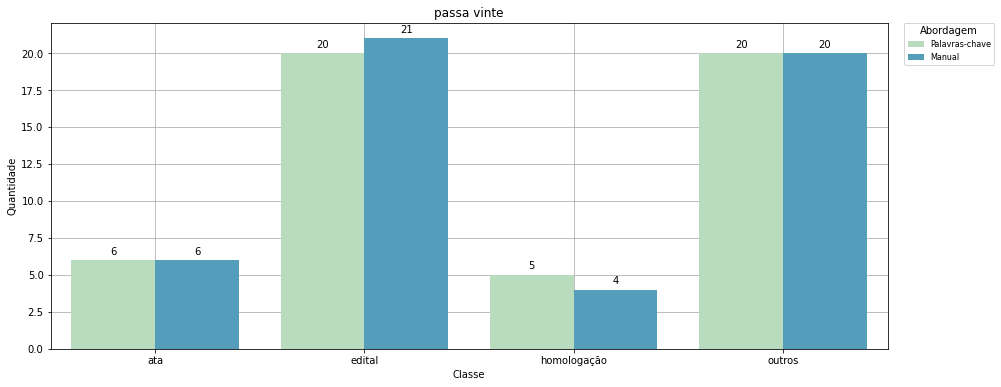

passa vinte
         class  level_0
0          ata        6
1       edital       21
2  homologação        4
3       outros       20
51.0


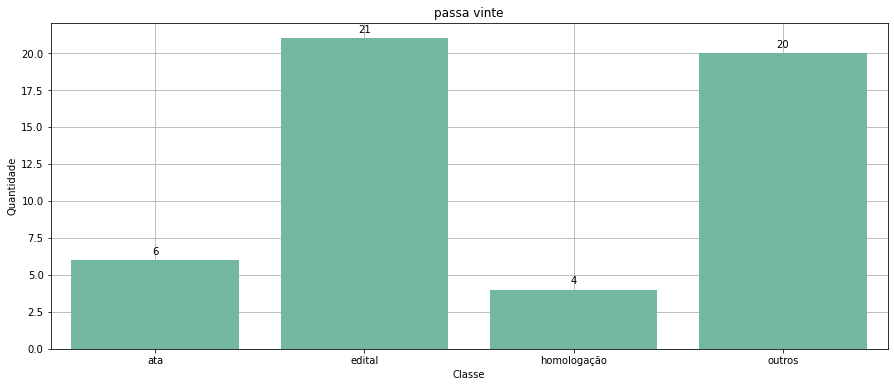

Município:  pirapetinga_doc_classification
          level_0         city        class   0
0  Palavras-chave  pirapetinga          ata  20
1  Palavras-chave  pirapetinga       edital  20
2  Palavras-chave  pirapetinga  homologação  20
3  Palavras-chave  pirapetinga       outros  20
4          Manual  pirapetinga          ata  19
5          Manual  pirapetinga       edital  15
6          Manual  pirapetinga  homologação  20
7          Manual  pirapetinga       outros  26


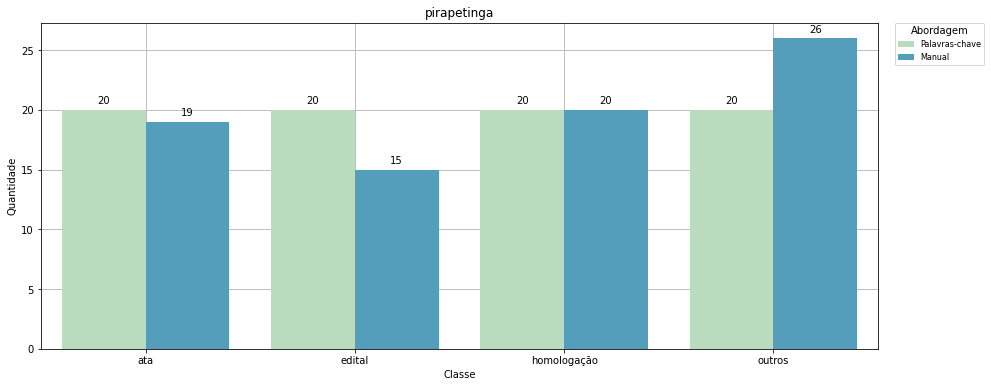

pirapetinga
         class  level_0
0          ata       19
1       edital       15
2  homologação       20
3       outros       26
80.0


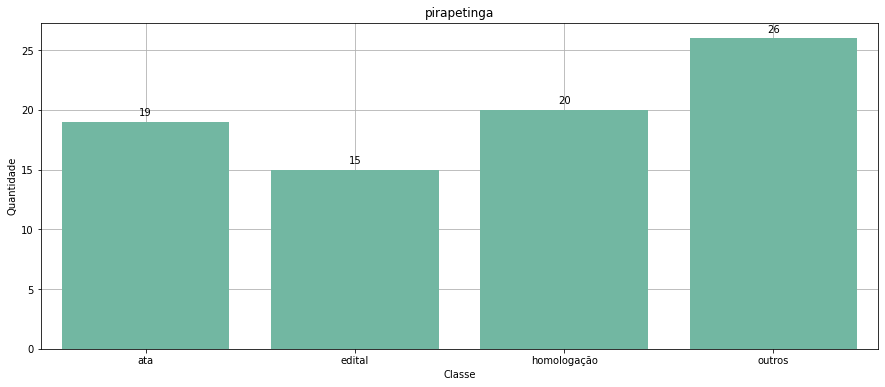

Município:  cristais_doc_classification
          level_0      city        class   0
0  Palavras-chave  cristais          ata  20
1  Palavras-chave  cristais       edital  20
2  Palavras-chave  cristais  homologação   2
3  Palavras-chave  cristais       outros  20
4          Manual  cristais          ata  14
5          Manual  cristais       edital  20
6          Manual  cristais  homologação   2
7          Manual  cristais       outros  26


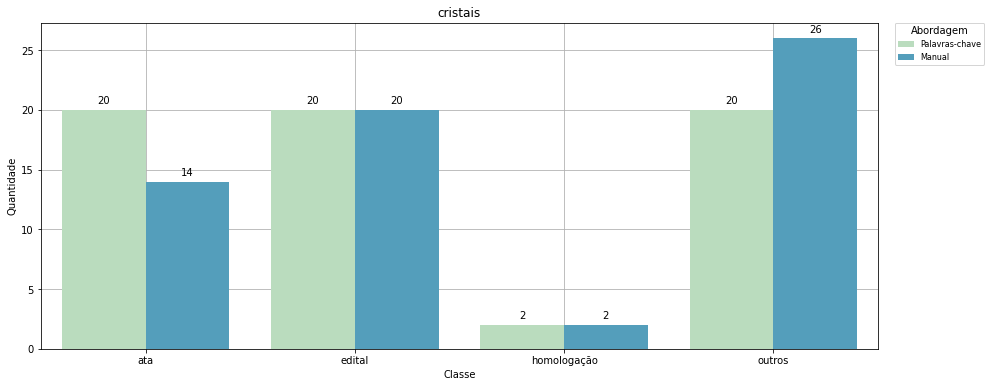

cristais
         class  level_0
0          ata       14
1       edital       20
2  homologação        2
3       outros       26
62.0


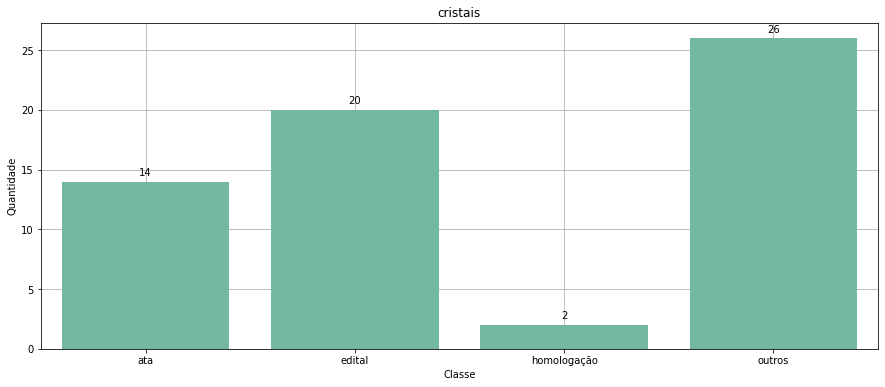

Município:  ijaci_doc_classification
          level_0   city        class   0
0  Palavras-chave  ijaci       edital  20
1  Palavras-chave  ijaci  homologação  20
2  Palavras-chave  ijaci       outros  20
3          Manual  ijaci       edital  20
4          Manual  ijaci  homologação  20
5          Manual  ijaci       outros  20


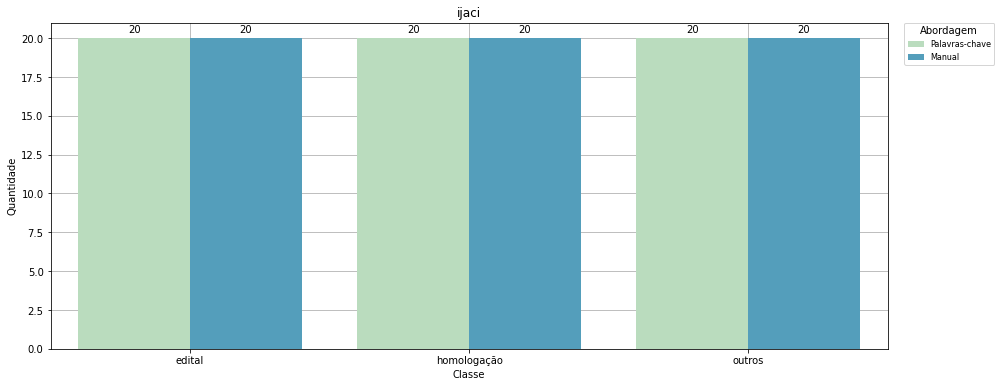

ijaci
         class  level_0
0       edital       20
1  homologação       20
2       outros       20
60.0


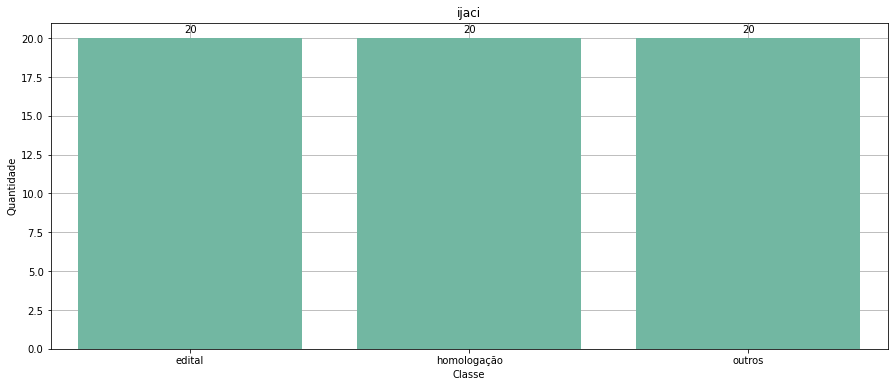

Município:  olaria_doc_classification
          level_0    city   class   0
0  Palavras-chave  olaria  edital   4
1  Palavras-chave  olaria  outros  20
2          Manual  olaria  edital   1
3          Manual  olaria  outros  23


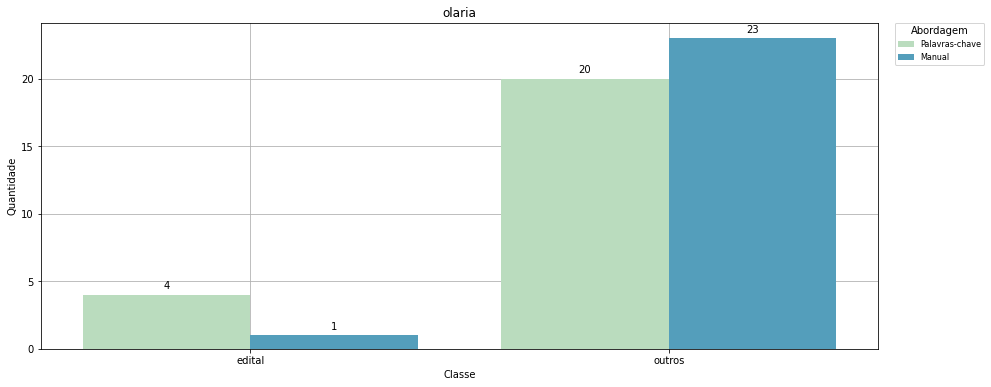

olaria
    class  level_0
0  edital        1
1  outros       23
24.0


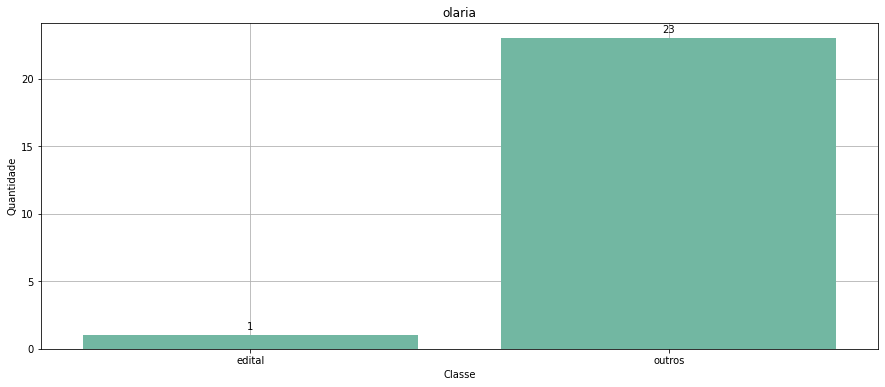

Município:  arantina_doc_classification
          level_0     class level_2   0
0  Palavras-chave  arantina     ata   1
1  Palavras-chave  arantina  edital  20
2  Palavras-chave  arantina  outros  20
3          Manual  arantina  edital  21
4          Manual  arantina  outros  20
Renomeação realizada com sucesso!!


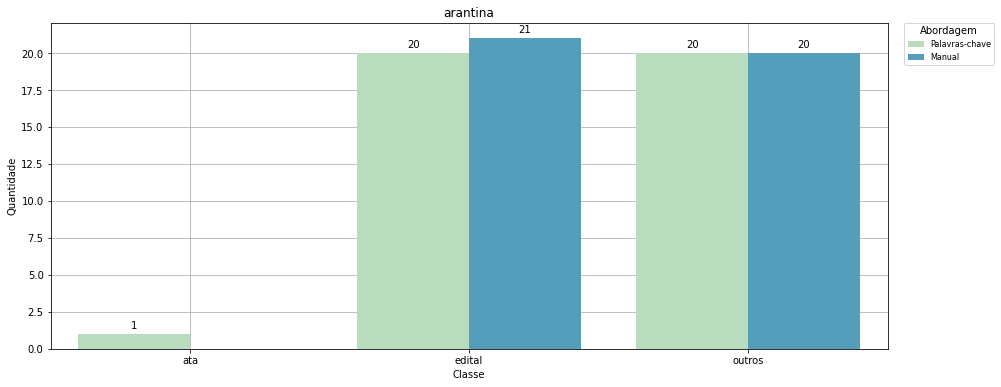

arantina
    class  level_0
0  edital       21
1  outros       20
41.0


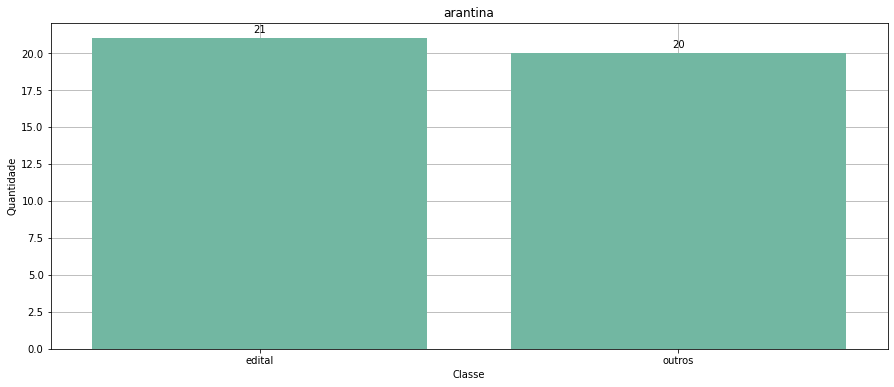

Município:  coqueiral_doc_classification
          level_0       city   class   0
0  Palavras-chave  coqueiral     ata  20
1  Palavras-chave  coqueiral  edital  20
2  Palavras-chave  coqueiral  outros  20
3          Manual  coqueiral     ata  20
4          Manual  coqueiral  edital  18
5          Manual  coqueiral  outros  22


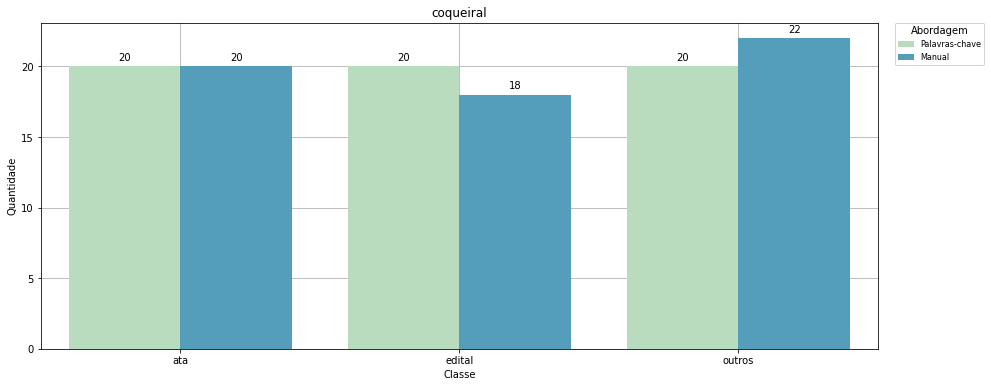

coqueiral
    class  level_0
0     ata       20
1  edital       18
2  outros       22
60.0


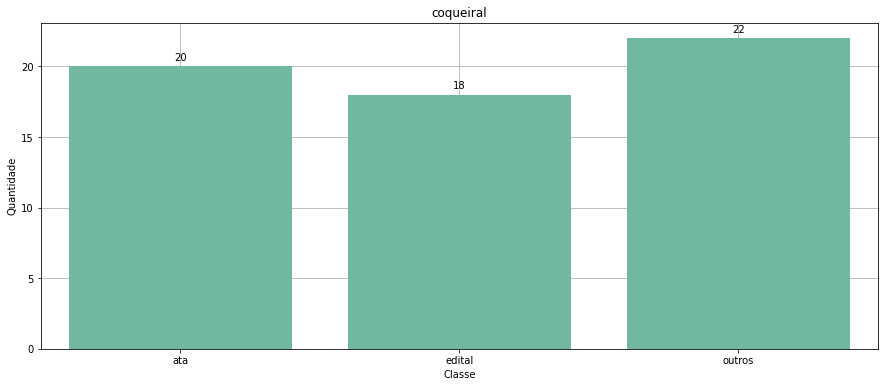

Município:  resultado_classificacao


KeyError: 'class'

In [12]:
df_geral = pd.DataFrame()

for file in iglob(root_dir+'*.xlsx'):
    
    
    df = leitura_planilha(file)
    
    
    #print(df["city"])
    
    #df2 = df.melt(value_vars=['class','real_class'])
    
    df['class'] = df.apply(lambda row : str(row['class']).lower().strip(), axis = 1)
    
    df['real_class'] = df.apply(lambda row : str(row['real_class']).lower().strip() if row['real_class'] is not None else "Vazio", axis = 1)
    
    #print(df)
    
    #print(df)
    
    df_real_class = df.groupby(["city", "real_class"])["real_class"].count()
    #df_real_class = df_real_class.to_frame().rename(columns={'real_class':'level_0'}).reset_index()
    
    
    #df_real_class = df_real_class.reset_index()
    
    df_class = df.groupby(["city", "class"])["class"].count()
    
   #df_class = df_class.reset_index()
    
    #df_aux = pd.DataFrame()
    #df_aux = pd.concat([df_aux, df_real_class])
    
    df_aux = pd.concat([df_class, df_real_class], keys=['Palavras-chave', 'Manual'])
    
    df_aux = df_aux.reset_index()
    
    df_aux = df_aux.rename({'level_1': 'class'}, axis=1)  # new method
    
    print(df_aux)
    
    
    #print(df_aux["class"][0])
    nome = file.split("/")[-1].split(".")[0]
    city = nome.split("_")[0]
    if city == df_aux["class"][0]:
        df_aux = df_aux.rename({'class': 'city'}, axis=1)
        df_aux = df_aux.rename({'level_2': 'class'}, axis=1)
        print("Renomeação realizada com sucesso!!")
    #df_real_class = df_real_class.rename({'real_class': 'class'}, axis=1)
    df_geral = df_geral.append(df_aux, ignore_index=True)
    
    #print(df_aux)
    
        
    gera_graficos(df_aux, city)
    
    #Gerar apenas para manual
    df_real_class_manual = df.groupby(["real_class"])["real_class"].count()
    df_real_class_manual = df_real_class_manual.to_frame().rename(columns={'real_class':'level_0'}).reset_index()
    df_real_class_manual = df_real_class_manual.rename({'real_class': 'class'}, axis=1)
    print(city)
    
    #print(df_real_class_manual["class"])
    
    print(df_real_class_manual)
    
    gera_graficos_manual(df_real_class_manual, city)
    
    
    
    
#print("Resultado: ", df_geral)

df_sum = df_geral.groupby(["level_0", "class", "city"]).sum().reset_index()

df_sum = df_sum.sort_values(by=["level_0", 'class', "city"], ascending=True)

df_sum = df_sum.rename({'city': 'Cidade'}, axis=1)
df_sum = df_sum.rename({'level_0': 'Abordagem'}, axis=1)



#print(df_palavras_chave)

plt.figure(figsize=(15, 6))
sns_geral = sns.catplot(x="class", y=df_sum[0], hue="Cidade", col="Abordagem",  data=df_sum, kind="swarm", height=4, aspect=1.5, palette="Set2")
sns_geral.set(xlabel="Classe", ylabel = "Quantidade")

#Salvando em alta resolução - dpi=600
sns_geral.savefig(root_dir+"img/comparacao_geral.png", dpi=200)

# Soma total de documentos nas classes 

In [ ]:
def gera_grafico_total_docs(df_total, nome):
    total_ata = sum(df_total[df_total['class']=="ata"][0])
    total_edital = sum(df_total[df_total['class']=="edital"][0])
    total_homol = sum(df_total[df_total['class']=="homologação"][0])
    total_outros = sum(df_total[df_total['class']=="outros"][0])

    x = ["Ata", "Edital", "Homologação", "Outros"]
    y = [total_ata, total_edital, total_homol, total_outros]

    plt.figure(figsize=(10, 5))
    sns_total = sns.barplot(x, y, color='#66c3a6', zorder=100)
    sns_total.set(xlabel="Classe", ylabel = "Quantidade")

    total = total_ata+total_edital+total_homol+total_outros


    '''for p in sns_total.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_total.annotate(percentage, (x, y),ha='center')'''

    for p in sns_total.patches:
        sns_total.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

    plt.grid(zorder=1)
    plt.show()
    sns_total = sns_total.get_figure()

    sns_total.savefig(root_dir+"img/total_por_classe_"+nome+".png", dpi=150)

In [ ]:
#df_sum

#Filtrando pela abordagem palavras-chave
df_palavras_chave = df_sum[df_sum['Abordagem']=="Palavras-chave"]
gera_grafico_total_docs(df_palavras_chave, "palavras_chave")

#Filtrando pela abordagem manual
df_palavras_chave = df_sum[df_sum['Abordagem']=="Manual"]
gera_grafico_total_docs(df_palavras_chave, "manual")




In [ ]:
df_sum

# Cálculo das métricas de avaliação

In [20]:
def update_xlsx(sheet_name, nome_metrica, valor_metrica):
    
    # Criar um arquivo em excel se não existir
    # Arquivo para armazenar o resultado da caracterização
    
    print(">> Criar ou abrir arquivo para salvar resultado da classificação")
          

    if not os.path.exists(root_dir+"/"+'resultado_classificacao.xlsx'):
        
        
        wb = openpyxl.Workbook()
        
        print("Criando um novo workbook...")
        
        ws = wb.active
        
        #std=wb.get_sheet_by_name('Sheet')
        ws = wb["Sheet"]
        #wb.remove_sheet(std)
        #std.remove(std['Sheet'])
        #print("Removendo aba padrão...")
        
        ws.title = 'Geral'
        print("Renomeando aba Geral...")
                
        ws.cell(column=1, row=ws.max_row, value="Métrica")
        ws.cell(column=2, row=ws.max_row, value="Valor")
        
    else:
        #Open an xlsx for reading
        wb = load_workbook(root_dir+"/"+'resultado_classificacao.xlsx')
        print("Workbook loading...")
    
    
    try:
        #Get the current Active Sheet
        ws = wb[sheet_name]
        
        print("Seleciona a aba: ", sheet_name)
    except KeyError:
        print("The worksheet '{}' does not exist for workbook '{}'. Creating one...".format(sheet_name,
                                                                                        'resultado_classificacao.xlsx'))
        ws = wb.create_sheet(sheet_name)
        print("Worksheet '{}' created successfully for workbook '{}'.".format(sheet_name, 'resultado_classificacao.xlsx'))
        
        ws.cell(column=1, row=ws.max_row, value="Métrica")
        ws.cell(column=2, row=ws.max_row, value="Valor")
    
    
    print(ws.max_row)
    
    linha = ws.max_row + 1
    
    ws.cell(column=1, row=linha, value=nome_metrica)
    ws.cell(column=2, row=linha, value=valor_metrica)
    
    
    print("Saving file metrica: "+nome_metrica)
    #save the csb file
    wb.save(root_dir+"img/resultado_classificacao.xlsx")

In [21]:
def plot_results_char(data, measure):
    #Reiniciando o ambiente de imagem
    plt.figure(figsize=(15, 6))
    
    
    #total = float(df_aux[0].sum()/2.0)
    clrs = ['grey' if (x == "Geral") else '#66c3a6' for x in data.sort_values('Valor', ascending = False).Cidade ]
    sns_plot = sns.barplot(x=data["Valor"], y=data["Cidade"],data=data, palette=clrs, zorder=100, ci=None, orient = 'h', order=data.sort_values('Valor', ascending = False).Cidade)
    
    sns_plot.set(xlabel=measure, ylabel = "Cidade")
    
    
    #sns_plot.set_title(title)
    
    #sns_plot.legend(title="Abordagem", fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    '''for p in sns_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        sns_plot.annotate(percentage, (x, y),ha='center')
        #sns_plot.annotate(y, (x, y),ha='center')'''
        
    for p in sns_plot.patches:
        sns_plot.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    
    
    plt.grid(zorder=1)
    plt.show()
    
    
    sns_plot = sns_plot.get_figure()
    
    #Salvando em alta resolução - dpi=600
    sns_plot.savefig(root_dir+"img/"+nome+measure+".png", dpi=150)
    

In [41]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

Município:  sao bento abade_doc_classification
Acurácia:  0.8571428571428571
>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
The worksheet 'sao bento abade' does not exist for workbook 'resultado_classificacao.xlsx'. Creating one...
Worksheet 'sao bento abade' created successfully for workbook 'resultado_classificacao.xlsx'.
1
Saving file metrica: Acurácia
Precisão macro:  0.8933823529411764
Precisão weighted:  0.8755252100840336
>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
The worksheet 'sao bento abade' does not exist for workbook 'resultado_classificacao.xlsx'. Creating one...
Worksheet 'sao bento abade' created successfully for workbook 'resultado_classificacao.xlsx'.
1
Saving file metrica: Precisão macro
>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
The worksheet 'sao bent

Renomeando aba Geral...
The worksheet 'ijaci' does not exist for workbook 'resultado_classificacao.xlsx'. Creating one...
Worksheet 'ijaci' created successfully for workbook 'resultado_classificacao.xlsx'.
1
Saving file metrica: Revocação weighted
F1_score:  [1. 1. 1.]
F1_score macro:  1.0
F1_score weighted:  1.0
>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
The worksheet 'ijaci' does not exist for workbook 'resultado_classificacao.xlsx'. Creating one...
Worksheet 'ijaci' created successfully for workbook 'resultado_classificacao.xlsx'.
1
Saving file metrica: F1_score macro
>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
The worksheet 'ijaci' does not exist for workbook 'resultado_classificacao.xlsx'. Creating one...
Worksheet 'ijaci' created successfully for workbook 'resultado_classificacao.xlsx'.
1
Saving file metrica: F1_score weighted
Municípi

/dados01/workspace/ufmg.f01dcc/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>> Criar ou abrir arquivo para salvar resultado da classificação
Criando um novo workbook...
Renomeando aba Geral...
Seleciona a aba:  Geral
1
Saving file metrica: F1_score weighted


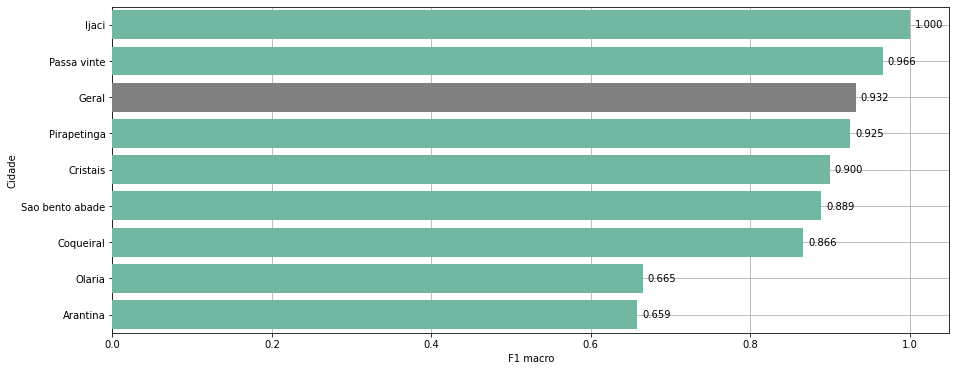

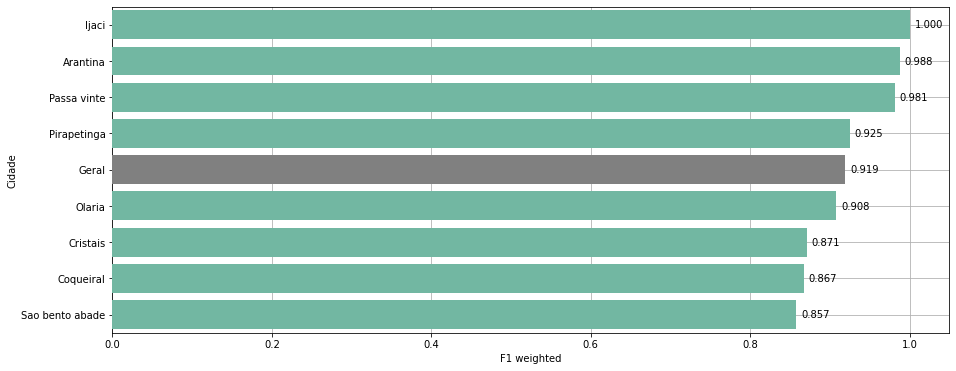

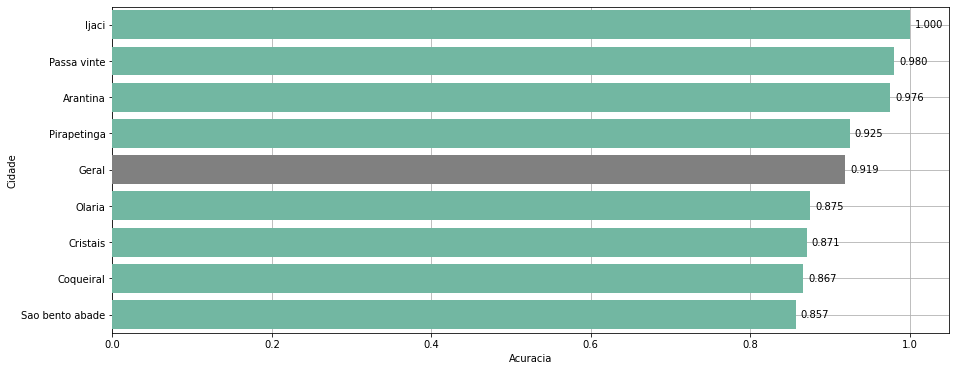

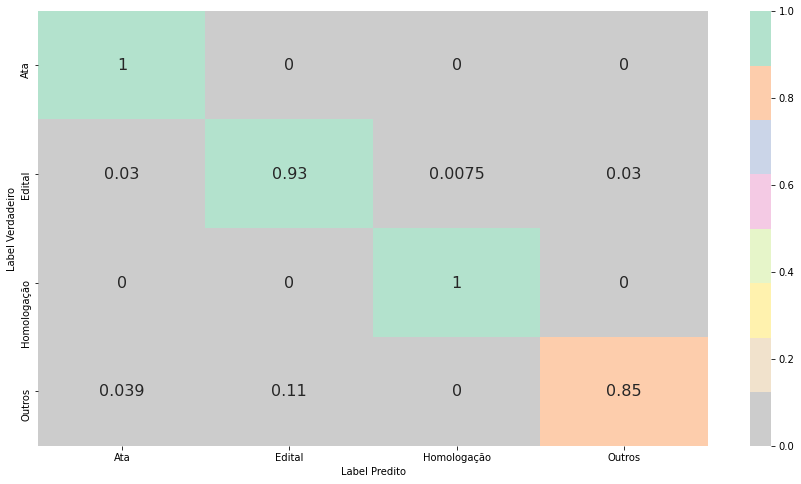

In [48]:
df_geral = pd.DataFrame(columns=['class', 'real_class'])

cols_macro = ['Cidade', 'Valor']
f1_macro = []
cols_w = ['Cidade', 'Valor']
f1_w = []

cols_acuracia = ['Cidade', 'Valor']
acuracia = []



for file in iglob(root_dir+'*.xlsx'):
    df = leitura_planilha(file)
    
    df['code_class'] = df['class'].replace(['ATA', 'EDITAL', 'HOMOLOGAÇÃO', 'OUTROS', 'INVÁLIDO'], [1, 2, 3, 4, 0])
    
    df['code_real_class'] = df['real_class'].replace(['ATA', 'EDITAL', 'HOMOLOGAÇÃO', 'OUTROS', 'INVÁLIDO'], [1, 2, 3, 4, 0])
    
    #print(df)

    y_pred = df["code_class"].tolist()
    
    #print(y_pred)
    
    #Ground truth vector
    y_true = df["code_real_class"].tolist()
    #print(y_true)
    
    #In binary and multiclass classification, this function is equal to the jaccard_score function
    print("Acurácia: ", accuracy_score(y_true, y_pred))

    update_xlsx(df['city'][0], "Acurácia", accuracy_score(y_true, y_pred))
    acuracia.append([df['city'][0].capitalize(), accuracy_score(y_true, y_pred)])

    
    #print("Precisão: ", precision_score(y_true, y_pred, average=None))
    print("Precisão macro: ", precision_score(y_true, y_pred, average='macro'))
    #print("Precisão micro: ", precision_score(y_true, y_pred, average='micro'))
    print("Precisão weighted: ", precision_score(y_true, y_pred, average='weighted'))
    
    update_xlsx(df['city'][0], "Precisão macro", precision_score(y_true, y_pred, average='macro'))
    update_xlsx(df['city'][0], "Precisão weighted", precision_score(y_true, y_pred, average='weighted'))
    
    
    print("Revocação: ", recall_score(y_true, y_pred, average=None)) 
    print("Revocação macro: ", recall_score(y_true, y_pred, average='macro'))
    #print("Revocação micro: ", recall_score(y_true, y_pred, average='micro'))
    print("Revocação weighted: ", recall_score(y_true, y_pred, average='weighted'))
    
    update_xlsx(df['city'][0], "Revocação macro", recall_score(y_true, y_pred, average='macro'))
    update_xlsx(df['city'][0], "Revocação weighted", recall_score(y_true, y_pred, average='weighted'))
    
    print("F1_score: ", f1_score(y_true, y_pred, average=None))
    print("F1_score macro: ", f1_score(y_true, y_pred, average='macro'))
    #print("F1_score micro: ", f1_score(y_true, y_pred, average='micro'))
    print("F1_score weighted: ", f1_score(y_true, y_pred, average='weighted'))
    
    update_xlsx(df['city'][0], "F1_score macro", f1_score(y_true, y_pred, average='macro'))
    f1_macro.append([df['city'][0].capitalize(), f1_score(y_true, y_pred, average='macro')])
    
    update_xlsx(df['city'][0], "F1_score weighted", f1_score(y_true, y_pred, average='weighted'))
    f1_w.append([df['city'][0].capitalize(), f1_score(y_true, y_pred, average='weighted')])
    
    #print(confusion_matrix(y_true, y_pred, normalize="true"))
    
    #print(df[['class','real_class']])
    
    df_geral = df_geral.append(df[['class','real_class']], ignore_index=True, sort=False)


    


#Valor métricas para todas as cidades
df_geral['code_class'] = df_geral['class'].replace(['ATA', 'EDITAL', 'HOMOLOGAÇÃO', 'OUTROS', 'INVÁLIDO'], [1, 2, 3, 4, 0])
    
df_geral['code_real_class'] = df_geral['real_class'].replace(['ATA', 'EDITAL', 'HOMOLOGAÇÃO', 'OUTROS', 'INVÁLIDO'], [1, 2, 3, 4, 0])
y_pred = df_geral["code_class"].tolist()
y_true = df_geral["code_real_class"].tolist()

#In binary and multiclass classification, this function is equal to the jaccard_score function
print(">> Métricas de avaliação geral - todos os munincipios juntos")
print("Acurácia: ", accuracy_score(y_true, y_pred))

update_xlsx("Geral", "Acurácia", accuracy_score(y_true, y_pred))
acuracia.append(["Geral", accuracy_score(y_true, y_pred)])

#print("Precisão: ", precision_score(y_true, y_pred, average=None))
print("Precisão macro : ", precision_score(y_true, y_pred, average='macro'))
#print("Precisão micro: ", precision_score(y_true, y_pred, average='micro'))
print("Precisão weighted: ", precision_score(y_true, y_pred, average='weighted'))

update_xlsx("Geral", "Precisão macro", precision_score(y_true, y_pred, average='macro'))
update_xlsx("Geral", "Precisão weighted", precision_score(y_true, y_pred, average='weighted'))


print("Revocação: ", recall_score(y_true, y_pred, average=None)) 
print("Revocação macro: ", recall_score(y_true, y_pred, average='macro'))
#print("Revocação micro: ", recall_score(y_true, y_pred, average='micro'))
print("Revocação weighted: ", recall_score(y_true, y_pred, average='weighted'))

update_xlsx("Geral", "Revocação macro", recall_score(y_true, y_pred, average='macro'))
update_xlsx("Geral", "Revocação weighted", recall_score(y_true, y_pred, average='weighted'))


print("F1_score: ", f1_score(y_true, y_pred, average=None))
print("F1_score macro: ", f1_score(y_true, y_pred, average='macro'))
#print("F1_score micro: ", f1_score(y_true, y_pred, average='micro'))
#print("F1_score weighted: ", f1_score(y_true, y_pred, average='weighted'))


update_xlsx("Geral", "F1_score macro", f1_score(y_true, y_pred, average='macro'))
update_xlsx("Geral", "F1_score weighted", f1_score(y_true, y_pred, average='weighted'))

f1_macro.append(["Geral", f1_score(y_true, y_pred, average='macro')])
f1_w.append(["Geral", f1_score(y_true, y_pred, average='weighted')])

df_f1_macro = pd.DataFrame(f1_macro, columns=cols_macro)
df_f1_w = pd.DataFrame(f1_w, columns=cols_w)
df_acuracia = pd.DataFrame(acuracia, columns=cols_acuracia)

plot_results_char(df_f1_macro, "F1 macro")
plot_results_char(df_f1_w, "F1 weighted")

plot_results_char(df_acuracia, "Acuracia")

d = { "1": "Ata", "2": "Edital", "3": "Homologação", "4": "Outros"}

y_true_str = [replace_all(str(x), d) for x in y_true]

y_pred_str = [replace_all(str(x), d) for x in y_pred]


df_cm = confusion_matrix(y_true_str, y_pred_str, normalize="true", labels=["Ata", "Edital", "Homologação", "Outros"])

plt.figure(figsize = (15,8))
sns_plot = sns.heatmap(df_cm, annot=True,  annot_kws={"size": 16}, cmap="Pastel2_r", xticklabels=["Ata", "Edital", "Homologação", "Outros"], yticklabels=["Ata", "Edital", "Homologação", "Outros"])
 
sns_plot.set(xlabel="Label Predito", ylabel = "Label Verdadeiro")

sns_plot = sns_plot.get_figure()

sns_plot.savefig(root_dir+"img/confusion-matrix-geral.png", dpi=150)

    
